# Graded Assignment 2: Deep Learning 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load the MNIST handwritten digits data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
n_train = x_train.shape[0]
n_test = x_test.shape[0]

#Scale the data points to be in [-1,1]
x_train, x_test = x_train / 127.5 - 1, x_test / 127.5 - 1

#Vectorising the datapoints for visualisation and preliminary questions
nb_features = np.prod(x_train.shape[1:])
x_train.resize((n_train, nb_features))
x_test.resize((n_test, nb_features))


#For use in task 5, find locations of images of 2 and 9
test_loc_two = np.where(y_test==2)[0][0]
test_loc_nine = np.where(y_test==9)[0][0]

### Task 1: Data visualisation

In [ ]:
from sklearn.decomposition import PCA
#use PCA to project the training data into a 2-dimensional space
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

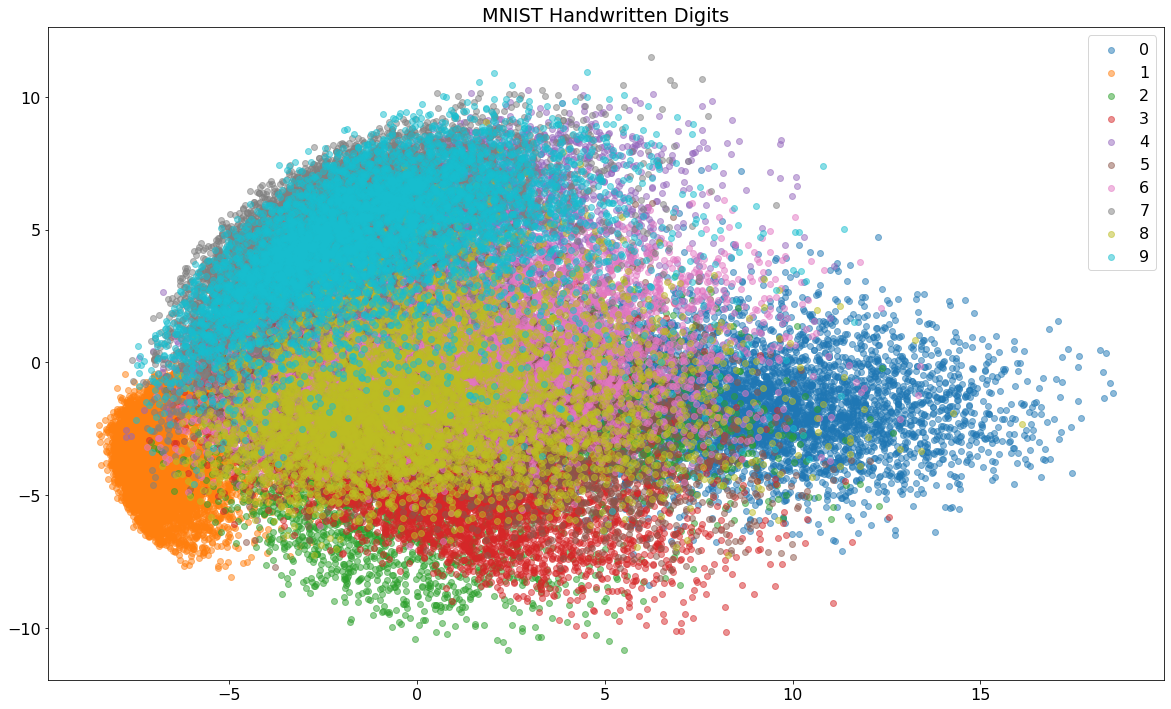

In [ ]:
#plotting the 2-D embedding
plot = plt.figure(figsize=(20,12))
plt.rcParams.update({'font.size':16})
for i in np.unique(y_train):
    j = np.where(y_train == i)
    plt.scatter(x_train_pca[j,0], x_train_pca[j,1], label = i, alpha = 0.5)
plt.legend()
plt.title('MNIST Handwritten Digits')
plt.show()

### Task 2: Perceptrons

In [2]:
# Change input type 
x_train = np.array(x_train, dtype=int)
x_test = np.array(x_test, dtype=int)
y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

# Select only classes 0 and 1 for binary classification 
cond = (y_train == 0) + (y_train == 1)
binary_x_train = x_train[cond,:]
binary_y_train = y_train[cond]*1
binary_y_train[binary_y_train == 0] = -1
binary_y_train[binary_y_train == 1] = 1

In [ ]:
def predict (x, w, b):

    prediction = np.dot(x, w) + b

    # If prediction meets activation critera, label 1, otherwise label -1
    if prediction >= 0:
        prediction = 1
    else:
        prediction = -1
    
    return prediction

In [ ]:
def optimize (x, y):
    iter = 0
    error = np.inf
    n, m = x.shape
    w = np.random.rand(m) #Intialize the w vector
    b = np.random.rand() #Intialize the b vector
    
    learning_rate = 0.01
    errors = []
    iters = []
    
    # Iterate until error sufficiently low
    while (iter <= 1000) & (error > 1e-3):

        emp_loss = 0
        
        for i in range(0,n):
            
            # Calculate initial predictions and loss
            y_prediction = predict(x[i], w, b)
            loss = (y_prediction - y[i])**2
            loss_derv = 2*(y_prediction - y[i])
            
            derivatives = np.array([j * loss_derv for j in x[i]])
            
            # Make small adjustments to weight 
            w = w - (learning_rate * derivatives)
            
        for i in range(0,n):

            # Calculate predictions after backward pass and total loss
            y_prediction = predict(x[i], w, b)
            loss = (y_prediction - y[i])**2
            emp_loss += loss    
            
        errors.append(emp_loss/len(x))
        iters.append(iter)
        error = errors[-1]
        iter += 1
        
    return w, b, errors

In [ ]:
np.random.seed(24)
the_w, the_b, training_error = optimize(binary_x_train, binary_y_train)

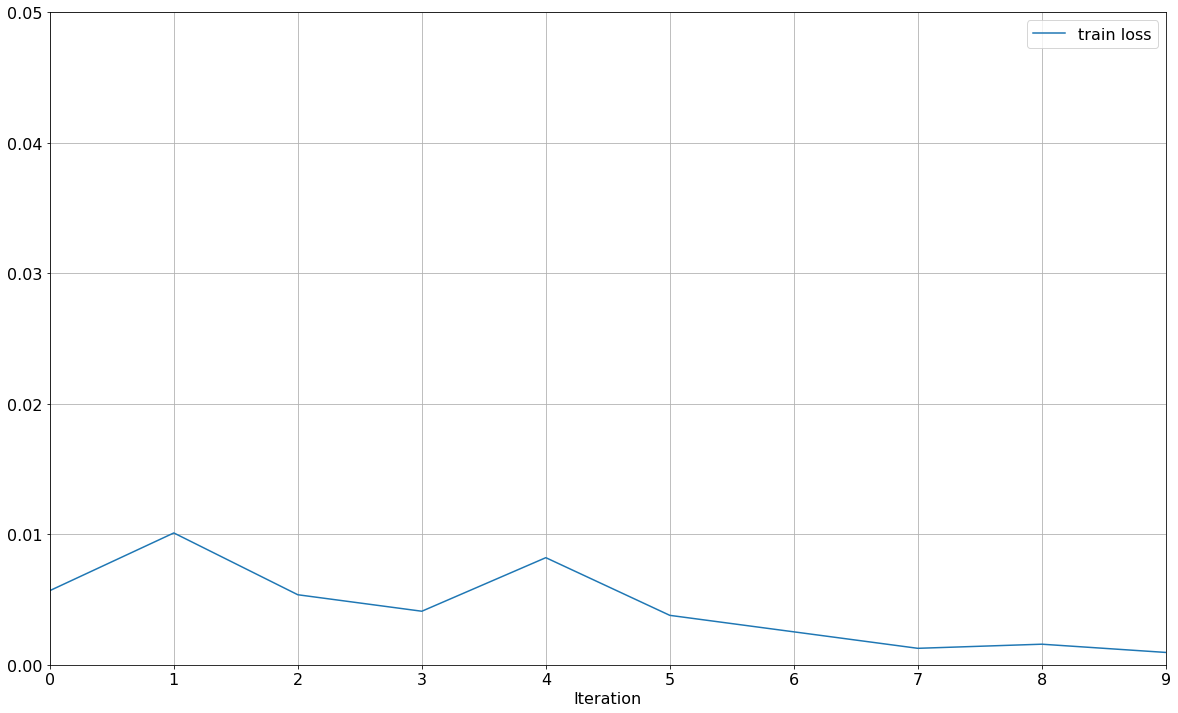

In [ ]:
plot = plt.figure(figsize=(20,12))
plt.plot(training_error, label='train loss')
plt.legend()
plt.grid(True)
plt.xlim([0,9])
plt.ylim([0,0.05])
plt.xlabel('Iteration')
plt.show()

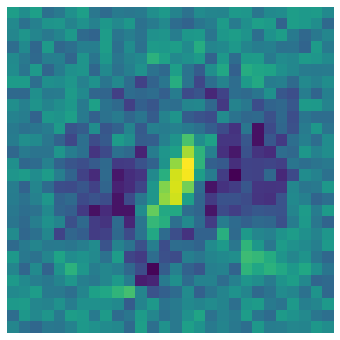

In [ ]:
# Visual representation of the_w
plot = plt.figure(figsize=(10,6))
plt.imshow(the_w.reshape([28,28]))
plt.axis('off')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate(x, y, w, b):

  # Returns accuracy score

  prediction = [predict(x[i], w, b) for i in range(0,x.shape[0])]

  accuracy = accuracy_score(np.array(prediction), y)

  return accuracy

In [ ]:
cond_2 = (y_test == 0) + (y_test == 1)

binary_x_test = x_test[cond_2,:]
binary_y_test = y_test[cond_2]*1
binary_y_test[binary_y_test == 0] = -1
binary_y_test[binary_y_test == 1] = 1

In [ ]:
train_accuracy = (100 * evaluate(binary_x_train, binary_y_train, the_w, the_b)).round(1).astype(str) + '%'
test_accuracy = (100 * evaluate(binary_x_test, binary_y_test, the_w, the_b)).round(1).astype(str) + '%'

print('Training accuracy =', train_accuracy)
print('Test accuracy = ', test_accuracy)

Training accuracy = 100.0%
Test accuracy =  99.8%


In [ ]:
from sklearn.metrics import confusion_matrix

binary_y_pred = np.array([predict(binary_x_test[i], the_w, the_b) for i in range(0,binary_x_test.shape[0])])

cm = pd.DataFrame(
    confusion_matrix(binary_y_test, binary_y_pred, labels=[-1, 1]), 
    index=['Truly 0', 'Truly 1'], 
    columns=['Predicted 0', 'Predicted 1'])

print(cm)

         Predicted 0  Predicted 1
Truly 0          978            2
Truly 1            2         1133


In [ ]:
def prepare_pairs(first, second):

  # Prepares pairs to be inputted into perceptron model

  cond = (y_train == first) + (y_train == second)

  binary_x_train = x_train[cond,:]
  binary_y_train = y_train[cond]*1
  binary_y_train[binary_y_train == first] = -1
  binary_y_train[binary_y_train == second] = 1

  cond_2 = (y_test == first) + (y_test == second)
  binary_x_test = x_test[cond_2,:]
  binary_y_test = y_test[cond_2]*1
  binary_y_test[binary_y_test == first] = -1
  binary_y_test[binary_y_test == second] = 1

  return binary_x_train, binary_y_train, binary_x_test, binary_y_test

In [ ]:
df = pd.DataFrame(columns=['Pair', 'Accuracy'])
pairs = [(1, 9), (2, 8), (3, 6), (4, 5), (0, 9)]

# Adds accuracy for 5 different pairs to a dataframe 

for pair in pairs:

  binary_x_train, binary_y_train, binary_x_test, binary_y_test = prepare_pairs(pair[0], pair[1])

  the_w, the_b, training_error = optimize(binary_x_train, binary_y_train)

  accuracy = evaluate(binary_x_test, binary_y_test, the_w, the_b)

  df = df.append({'Pair':pair, 'Accuracy':accuracy}, ignore_index=True)


In [ ]:
df['Accuracy'] = (100 * df['Accuracy']).round(1).astype(str) + '%'

In [ ]:
display(df)

,Pair,Accuracy
0,"(1, 9)",99.5%
1,"(2, 8)",96.2%
2,"(3, 6)",99.3%
3,"(4, 5)",98.1%
4,"(0, 9)",99.0%


### Task 3: Multi-Layer Perceptron 

In [3]:
#Convert label vectors to matrices using one-hot encoding
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

3.1

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
MLP_model = Sequential(
    [
        tf.keras.layers.InputLayer(input_shape = (784,)),
        Dense(1000, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

In [ ]:
MLP_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam_MLP = tf.keras.optimizers.Adam(learning_rate=0.001)
MLP_model.compile(optimizer=adam_MLP,
              loss='categorical_crossentropy', #use categorical cross-entropy loss as we have used one-hot encoding
              metrics=['accuracy'])

In [ ]:
MLP_history = MLP_model.fit(x_train, y_train, epochs=10, batch_size=300, validation_data=(x_test,y_test))

Epoch 1/10
200/200 [==============================] - 4s 5ms/step - loss: 0.5056 - accuracy: 0.8505 - val_loss: 0.2264 - val_accuracy: 0.9307
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2041 - accuracy: 0.9369 - val_loss: 0.2054 - val_accuracy: 0.9335
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1468 - accuracy: 0.9545 - val_loss: 0.1402 - val_accuracy: 0.9561
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1245 - accuracy: 0.9607 - val_loss: 0.1381 - val_accuracy: 0.9581
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0980 - accuracy: 0.9688 - val_loss: 0.0965 - val_accuracy: 0.9713
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0859 - accuracy: 0.9719 - val_loss: 0.1008 - val_accuracy: 0.9692
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0805 - accuracy: 0.9747 - val_loss: 0.0944 - val_accuracy: 0.9690
Epoch 

In [ ]:
#function to plot the accuracy and loss of the training and testing data over the epochs
def plot_model(history):

    fig = plt.figure(figsize=(10,5))
    fig.add_subplot(1,2,1)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='test loss')
    plt.legend()
    plt.grid(True)
    plt.ylim([0,max(history.history['loss'])+0.2])
    plt.xlabel('epoch')
    plt.ylabel('Loss')

    fig.add_subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='test accuracy')
    plt.legend()
    plt.grid(True)
    plt.ylim([min(history.history['accuracy'])-0.2,1.2])
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')

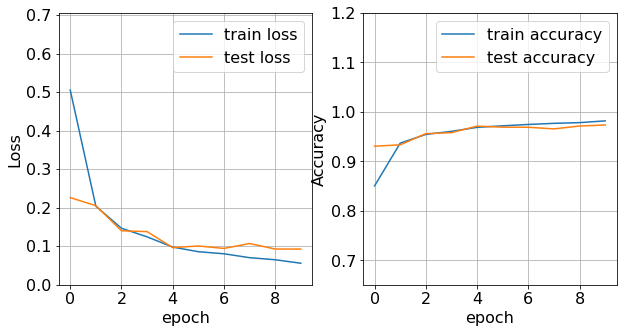

In [ ]:
plot_model(MLP_history)

3.2

Having produced the first MLP neural network with two hidden layers, I will run this again with different numbers of hidden layers and see how the different models compare.

I will start by using 3 hidden layers. I have explored using different numbers of neurons per layer and this is detailed in the report.

In [ ]:
MLP_model_3layers = Sequential(
    [
        tf.keras.layers.InputLayer(input_shape = (784,)),
        Dense(300, activation='relu'),
        Dense(250, activation='relu'),
        Dense(200, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

In [ ]:
MLP_model_3layers.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 250)               75250     
                                                                 
 dense_5 (Dense)             (None, 200)               50200     
                                                                 
 dense_6 (Dense)             (None, 10)                2010      
                                                                 
Total params: 362,960
Trainable params: 362,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
MLP_model_3layers.compile(optimizer=adam_MLP,
              loss='categorical_crossentropy', #use categorical cross-entropy loss as we have used one-hot encoding
              metrics=['accuracy'])

In [ ]:
MLP_3layers_history = MLP_model_3layers.fit(x_train, y_train, epochs=10, batch_size=300, validation_data=(x_test,y_test))

Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 0.5822 - accuracy: 0.8147 - val_loss: 0.2797 - val_accuracy: 0.9121
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2518 - accuracy: 0.9222 - val_loss: 0.2156 - val_accuracy: 0.9330
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1942 - accuracy: 0.9399 - val_loss: 0.1790 - val_accuracy: 0.9426
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1633 - accuracy: 0.9494 - val_loss: 0.1615 - val_accuracy: 0.9475
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1451 - accuracy: 0.9545 - val_loss: 0.1457 - val_accuracy: 0.9522
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1280 - accuracy: 0.9598 - val_loss: 0.1304 - val_accuracy: 0.9600
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1124 - accuracy: 0.9651 - val_loss: 0.1180 - val_accuracy: 0.9643
Epoch 

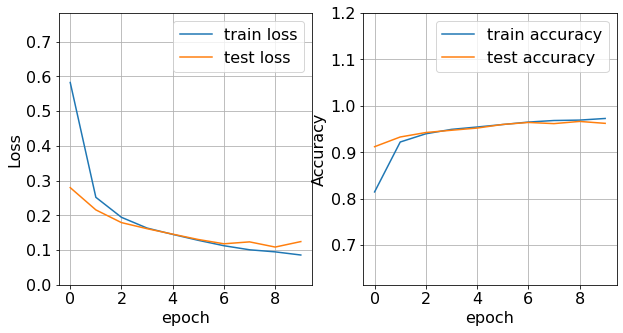

In [ ]:
plot_model(MLP_3layers_history)

Now 5 hidden layers.

In [ ]:
MLP_model_5layers = Sequential(
    [
        tf.keras.layers.InputLayer(input_shape = (784,)),
        Dense(300, activation='relu'),
        Dense(250, activation='relu'),
        Dense(200, activation='relu'),
        Dense(150, activation='relu'),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

In [ ]:
MLP_model_5layers.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 300)               235500    
                                                                 
 dense_8 (Dense)             (None, 250)               75250     
                                                                 
 dense_9 (Dense)             (None, 200)               50200     
                                                                 
 dense_10 (Dense)            (None, 150)               30150     
                                                                 
 dense_11 (Dense)            (None, 100)               15100     
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 407,210
Trainable params: 407,210
Non-tr

In [ ]:
MLP_model_5layers.compile(optimizer=adam_MLP,
              loss='categorical_crossentropy', #use categorical cross-entropy loss as we have used one-hot encoding
              metrics=['accuracy'])

In [ ]:
MLP_5layers_history = MLP_model_5layers.fit(x_train, y_train, epochs=10, batch_size=300, validation_data=(x_test,y_test))

Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 0.7068 - accuracy: 0.7574 - val_loss: 0.3124 - val_accuracy: 0.9047
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2575 - accuracy: 0.9190 - val_loss: 0.2360 - val_accuracy: 0.9272
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1987 - accuracy: 0.9377 - val_loss: 0.2042 - val_accuracy: 0.9375
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1647 - accuracy: 0.9487 - val_loss: 0.1635 - val_accuracy: 0.9521
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1457 - accuracy: 0.9537 - val_loss: 0.1591 - val_accuracy: 0.9528
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1321 - accuracy: 0.9587 - val_loss: 0.1370 - val_accuracy: 0.9565
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1158 - accuracy: 0.9638 - val_loss: 0.1651 - val_accuracy: 0.9492
Epoch 

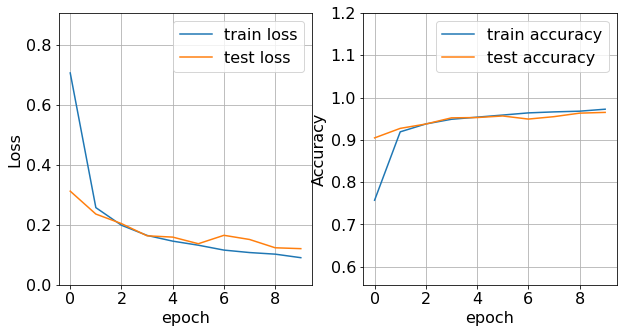

In [ ]:
plot_model(MLP_5layers_history)

Now 7 hidden layers.

In [ ]:
MLP_model_7layers = Sequential(
    [
        tf.keras.layers.InputLayer(input_shape = (784,)),
        Dense(300, activation='relu'),
        Dense(275, activation='relu'),
        Dense(250, activation='relu'),
        Dense(225, activation='relu'),
        Dense(200, activation='relu'),
        Dense(175, activation='relu'),
        Dense(150, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

In [ ]:
MLP_model_7layers.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 300)               235500    
                                                                 
 dense_14 (Dense)            (None, 275)               82775     
                                                                 
 dense_15 (Dense)            (None, 250)               69000     
                                                                 
 dense_16 (Dense)            (None, 225)               56475     
                                                                 
 dense_17 (Dense)            (None, 200)               45200     
                                                                 
 dense_18 (Dense)            (None, 175)               35175     
                                                                 
 dense_19 (Dense)            (None, 150)              

In [ ]:
MLP_model_7layers.compile(optimizer=adam_MLP,
              loss='categorical_crossentropy', #use categorical cross-entropy loss as we have used one-hot encoding
              metrics=['accuracy'])

In [ ]:
MLP_7layers_history = MLP_model_7layers.fit(x_train, y_train, epochs=10, batch_size=300, validation_data=(x_test,y_test))

Epoch 1/10
200/200 [==============================] - 2s 5ms/step - loss: 1.0884 - accuracy: 0.5959 - val_loss: 0.4186 - val_accuracy: 0.8718
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3339 - accuracy: 0.8980 - val_loss: 0.2610 - val_accuracy: 0.9184
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2302 - accuracy: 0.9290 - val_loss: 0.2099 - val_accuracy: 0.9355
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1885 - accuracy: 0.9431 - val_loss: 0.1877 - val_accuracy: 0.9404
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1628 - accuracy: 0.9500 - val_loss: 0.1738 - val_accuracy: 0.9466
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1414 - accuracy: 0.9560 - val_loss: 0.1464 - val_accuracy: 0.9574
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1291 - accuracy: 0.9601 - val_loss: 0.1476 - val_accuracy: 0.9551
Epoch 

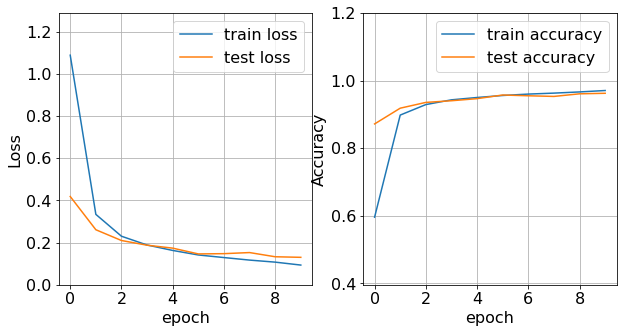

In [ ]:
plot_model(MLP_7layers_history)

Now 10 hidden layers.

In [ ]:
MLP_model_10layers = Sequential(
    [
        tf.keras.layers.InputLayer(input_shape = (784,)),
        Dense(300, activation='relu'),
        Dense(275, activation='relu'),
        Dense(250, activation='relu'),
        Dense(225, activation='relu'),
        Dense(200, activation='relu'),
        Dense(175, activation='relu'),
        Dense(150, activation='relu'),
        Dense(125, activation='relu'),
        Dense(100, activation='relu'),
        Dense(75, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

In [ ]:
MLP_model_10layers.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 300)               235500    
                                                                 
 dense_22 (Dense)            (None, 275)               82775     
                                                                 
 dense_23 (Dense)            (None, 250)               69000     
                                                                 
 dense_24 (Dense)            (None, 225)               56475     
                                                                 
 dense_25 (Dense)            (None, 200)               45200     
                                                                 
 dense_26 (Dense)            (None, 175)               35175     
                                                                 
 dense_27 (Dense)            (None, 150)              

In [ ]:
MLP_model_10layers.compile(optimizer=adam_MLP,
              loss='categorical_crossentropy', #use categorical cross-entropy loss as we have used one-hot encoding
              metrics=['accuracy'])

In [ ]:
MLP_10layers_history = MLP_model_10layers.fit(x_train, y_train, epochs=10, batch_size=300, validation_data=(x_test,y_test))

Epoch 1/10
200/200 [==============================] - 2s 5ms/step - loss: 1.9367 - accuracy: 0.2308 - val_loss: 1.2074 - val_accuracy: 0.5220
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.7672 - accuracy: 0.7296 - val_loss: 0.5205 - val_accuracy: 0.8397
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4620 - accuracy: 0.8591 - val_loss: 0.4164 - val_accuracy: 0.8758
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3471 - accuracy: 0.8970 - val_loss: 0.2840 - val_accuracy: 0.9146
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2872 - accuracy: 0.9152 - val_loss: 0.2476 - val_accuracy: 0.9252
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2416 - accuracy: 0.9277 - val_loss: 0.2290 - val_accuracy: 0.9336
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2118 - accuracy: 0.9366 - val_loss: 0.2127 - val_accuracy: 0.9348
Epoch 

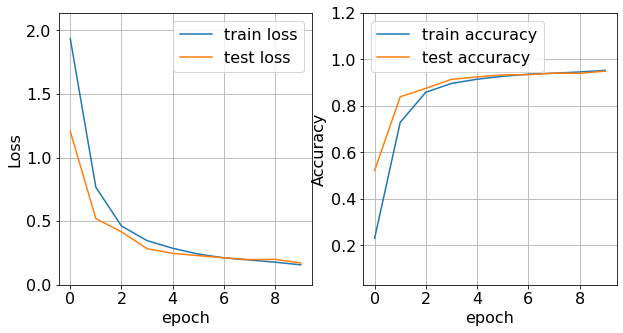

In [ ]:
plot_model(MLP_10layers_history)

In [ ]:
#Function to plot the accuracy of each of the MLPs over the epochs
def plot_layer_comparison(two_layer,three_layer,five_layer,seven_layer,ten_layer):

    fig = plt.figure(figsize=(10,5))
    plt.plot(two_layer.history['accuracy'], label='two hidden layers')
    plt.plot(three_layer.history['accuracy'], label='three hidden layers')
    plt.plot(five_layer.history['accuracy'], label='five hidden layers')
    plt.plot(seven_layer.history['accuracy'], label='seven hidden layers')
    plt.plot(ten_layer.history['accuracy'], label='ten hidden layers')
    plt.legend()
    plt.grid(True)
    plt.ylim([min(ten_layer.history['accuracy'])-0.1,1.1])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

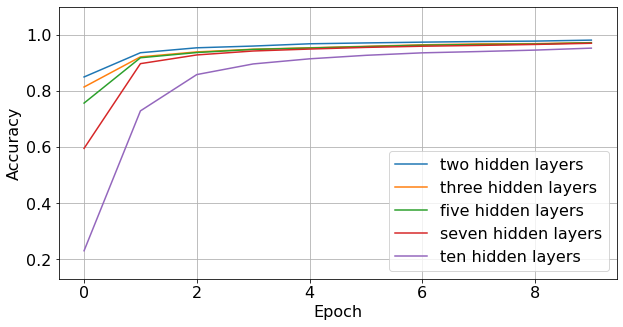

In [ ]:
plot_layer_comparison(MLP_history,MLP_3layers_history,MLP_5layers_history,MLP_7layers_history,MLP_10layers_history)

### Task 4: Convolutional Neural Network 

In [5]:
#Resizing the images to get the original shape back
edge = int(np.sqrt(nb_features))
x_train.resize([n_train, edge, edge,1])
x_test.resize([n_test, edge, edge,1])

4.1

In [6]:
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

In [ ]:
CNN_model = Sequential(   
    [
        Conv2D(32, kernel_size=(4,4),strides=(1,1),padding = 'same',activation='relu',input_shape=(28,28,1)),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, kernel_size=(4,4),strides=(2,2),padding='same',activation='relu'),
        
        Conv2D(128, kernel_size=(4,4),strides=(2,2),padding='same',activation='relu'),

        Flatten(),

        Dense(10, activation='softmax')
    ]
)

In [ ]:
CNN_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         131200    
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_32 (Dense)            (None, 10)                20490     
                                                      

In [ ]:
adam_CNN = tf.keras.optimizers.Adam(learning_rate=0.001)
CNN_model.compile(optimizer=adam_CNN,
              loss='categorical_crossentropy', #use categorical cross-entropy loss as we have used one-hot encoding
              metrics=['accuracy'])

In [ ]:
CNN_history = CNN_model.fit(x_train, y_train, epochs=10, batch_size=300, validation_data=(x_test,y_test))

Epoch 1/10
200/200 [==============================] - 8s 6ms/step - loss: 0.4208 - accuracy: 0.8767 - val_loss: 0.1338 - val_accuracy: 0.9591
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1044 - accuracy: 0.9690 - val_loss: 0.0782 - val_accuracy: 0.9750
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0697 - accuracy: 0.9788 - val_loss: 0.0600 - val_accuracy: 0.9804
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0539 - accuracy: 0.9837 - val_loss: 0.0512 - val_accuracy: 0.9847
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0434 - accuracy: 0.9867 - val_loss: 0.0595 - val_accuracy: 0.9813
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0371 - accuracy: 0.9885 - val_loss: 0.0453 - val_accuracy: 0.9854
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0316 - accuracy: 0.9903 - val_loss: 0.0476 - val_accuracy: 0.9845
Epoch 

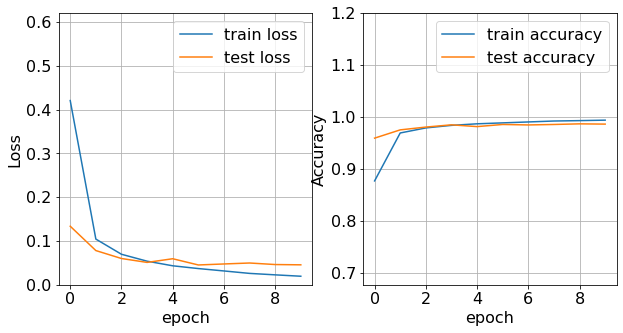

In [ ]:
plot_model(CNN_history)

4.2

Now to look at changing the number of layers in the CNN.

In [ ]:
CNN_model_4layers = Sequential(   
    [
        Conv2D(32, kernel_size=(4,4),strides=(1,1),padding = 'valid',activation='relu',input_shape=(28,28,1)),
        Conv2D(32, kernel_size=(4,4),strides=(1,1),padding = 'valid',activation='relu'),
        
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, kernel_size=(4,4),strides=(2,2),padding='valid',activation='relu'),
        
        Conv2D(128, kernel_size=(4,4),strides=(2,2),padding='valid',activation='relu'),

        Flatten(),

        Dense(10, activation='softmax')
    ]
)

In [ ]:
CNN_model_4layers.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          32832     
                                                                 
 conv2d_6 (Conv2D)           (None, 1, 1, 128)         131200    
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                      

In [ ]:
CNN_model_4layers.compile(optimizer=adam_CNN,
              loss='categorical_crossentropy', #use categorical cross-entropy loss as we have used one-hot encoding
              metrics=['accuracy'])

In [ ]:
CNN_history_4layers = CNN_model_4layers.fit(x_train, y_train, epochs=10, batch_size=6000, validation_data=(x_test,y_test))

Epoch 1/10
10/10 [==============================] - 2s 80ms/step - loss: 1.8113 - accuracy: 0.4458 - val_loss: 0.9098 - val_accuracy: 0.7062
Epoch 2/10
10/10 [==============================] - 0s 40ms/step - loss: 0.6963 - accuracy: 0.8003 - val_loss: 0.3847 - val_accuracy: 0.8906
Epoch 3/10
10/10 [==============================] - 0s 40ms/step - loss: 0.3237 - accuracy: 0.9061 - val_loss: 0.2306 - val_accuracy: 0.9319
Epoch 4/10
10/10 [==============================] - 0s 40ms/step - loss: 0.2142 - accuracy: 0.9385 - val_loss: 0.1723 - val_accuracy: 0.9474
Epoch 5/10
10/10 [==============================] - 0s 40ms/step - loss: 0.1613 - accuracy: 0.9530 - val_loss: 0.1370 - val_accuracy: 0.9582
Epoch 6/10
10/10 [==============================] - 0s 41ms/step - loss: 0.1294 - accuracy: 0.9613 - val_loss: 0.1124 - val_accuracy: 0.9662
Epoch 7/10
10/10 [==============================] - 0s 42ms/step - loss: 0.1093 - accuracy: 0.9679 - val_loss: 0.0977 - val_accuracy: 0.9703
Epoch 8/10
10

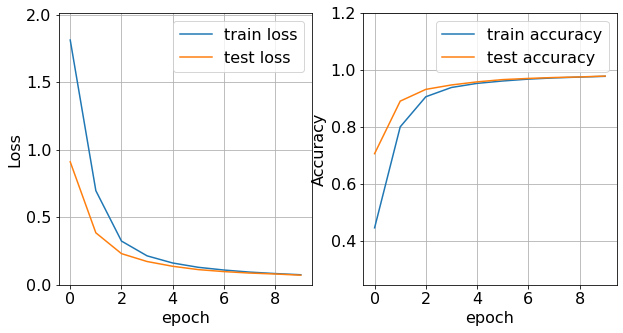

In [ ]:
plot_model(CNN_history_4layers)

In [ ]:
CNN_model_5layers = Sequential(   
    [
        Conv2D(32, kernel_size=(4,4),strides=(1,1),padding = 'valid',activation='relu',input_shape=(28,28,1)),
        Conv2D(32, kernel_size=(4,4),strides=(1,1),padding = 'valid',activation='relu'),
        
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, kernel_size=(4,4),strides=(1,1),padding='valid',activation='relu'),        
        
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(64, kernel_size=(4,4),strides=(2,2),padding='same',activation='relu'),        
        
        Conv2D(128, kernel_size=(4,4),strides=(2,2),padding='same',activation='relu'),

        Flatten(),

        Dense(10, activation='softmax')
    ]
)

In [ ]:
CNN_model_5layers.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 conv2d_8 (Conv2D)           (None, 22, 22, 32)        16416     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 64)          32832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 2, 2, 64)         

In [ ]:
CNN_model_5layers.compile(optimizer=adam_CNN,
              loss='categorical_crossentropy', #use categorical cross-entropy loss as we have used one-hot encoding
              metrics=['accuracy'])

In [ ]:
CNN_history_5layers = CNN_model_5layers.fit(x_train, y_train, epochs=10, batch_size=6000, validation_data=(x_test,y_test))

Epoch 1/10
10/10 [==============================] - 1s 73ms/step - loss: 1.9266 - accuracy: 0.3050 - val_loss: 0.9601 - val_accuracy: 0.7110
Epoch 2/10
10/10 [==============================] - 0s 45ms/step - loss: 0.7250 - accuracy: 0.7803 - val_loss: 0.3342 - val_accuracy: 0.8983
Epoch 3/10
10/10 [==============================] - 0s 45ms/step - loss: 0.2685 - accuracy: 0.9206 - val_loss: 0.1631 - val_accuracy: 0.9529
Epoch 4/10
10/10 [==============================] - 0s 45ms/step - loss: 0.1482 - accuracy: 0.9562 - val_loss: 0.1044 - val_accuracy: 0.9671
Epoch 5/10
10/10 [==============================] - 0s 45ms/step - loss: 0.1069 - accuracy: 0.9674 - val_loss: 0.0838 - val_accuracy: 0.9746
Epoch 6/10
10/10 [==============================] - 0s 44ms/step - loss: 0.0850 - accuracy: 0.9737 - val_loss: 0.0671 - val_accuracy: 0.9784
Epoch 7/10
10/10 [==============================] - 0s 44ms/step - loss: 0.0696 - accuracy: 0.9780 - val_loss: 0.0620 - val_accuracy: 0.9801
Epoch 8/10
10

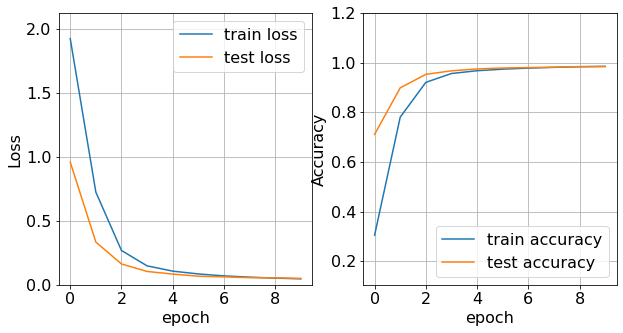

In [ ]:
plot_model(CNN_history_5layers)

In [ ]:
CNN_model_2layers = Sequential(   
    [
        Conv2D(32, kernel_size=(4,4),strides=(1,1),padding = 'valid',activation='relu',input_shape=(28,28,1)),
        
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, kernel_size=(4,4),strides=(1,1),padding='valid',activation='relu'),

        Flatten(),

        Dense(10, activation='softmax')
    ]
)

In [ ]:
CNN_model_2layers.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 9, 9, 64)          32832     
                                                                 
 flatten_3 (Flatten)         (None, 5184)              0         
                                                                 
 dense_35 (Dense)            (None, 10)                51850     
                                                                 
Total params: 85,226
Trainable params: 85,226
Non-trainable params: 0
__________________________________________________

In [ ]:
CNN_model_2layers.compile(optimizer=adam_CNN,
              loss='categorical_crossentropy', #use categorical cross-entropy loss as we have used one-hot encoding
              metrics=['accuracy'])

In [ ]:
CNN_history_2layers = CNN_model_2layers.fit(x_train, y_train, epochs=10, batch_size=300, validation_data=(x_test,y_test))

Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2246 - accuracy: 0.9323 - val_loss: 0.0669 - val_accuracy: 0.9792
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0613 - accuracy: 0.9815 - val_loss: 0.0496 - val_accuracy: 0.9836
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0450 - accuracy: 0.9864 - val_loss: 0.0449 - val_accuracy: 0.9847
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.0410 - val_accuracy: 0.9869
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.0437 - val_accuracy: 0.9854
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0246 - accuracy: 0.9929 - val_loss: 0.0423 - val_accuracy: 0.9867
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 0.0398 - val_accuracy: 0.9882
Epoch 

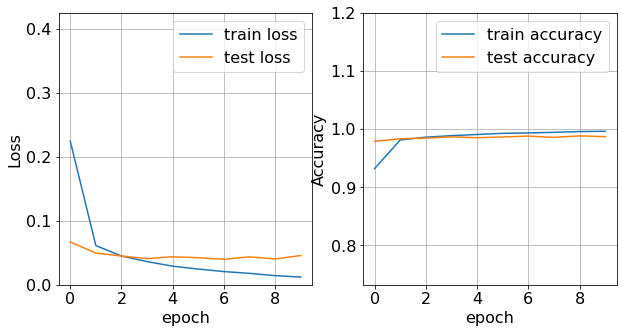

In [ ]:
plot_model(CNN_history_2layers)

In [ ]:
CNN_model_1layer = Sequential(   
    [
        Conv2D(32, kernel_size=(4,4),strides=(1,1),padding = 'valid',activation='relu',input_shape=(28,28,1)),
        
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),

        Dense(10, activation='softmax')
    ]
)

In [ ]:
CNN_model_1layer.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_36 (Dense)            (None, 10)                46090     
                                                                 
Total params: 46,634
Trainable params: 46,634
Non-trainable params: 0
_________________________________________________________________


In [ ]:
CNN_model_1layer.compile(optimizer=adam_CNN,
              loss='categorical_crossentropy', #use categorical cross-entropy loss as we have used one-hot encoding
              metrics=['accuracy'])

In [ ]:
CNN_history_1layer = CNN_model_1layer.fit(x_train, y_train, epochs=10, batch_size=300, validation_data=(x_test,y_test))

Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2469 - accuracy: 0.9287 - val_loss: 0.1060 - val_accuracy: 0.9697
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0954 - accuracy: 0.9719 - val_loss: 0.0859 - val_accuracy: 0.9735
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0753 - accuracy: 0.9775 - val_loss: 0.0728 - val_accuracy: 0.9783
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0645 - accuracy: 0.9813 - val_loss: 0.0714 - val_accuracy: 0.9788
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0573 - accuracy: 0.9828 - val_loss: 0.0665 - val_accuracy: 0.9793
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0524 - accuracy: 0.9845 - val_loss: 0.0633 - val_accuracy: 0.9793
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0479 - accuracy: 0.9855 - val_loss: 0.0643 - val_accuracy: 0.9801
Epoch 

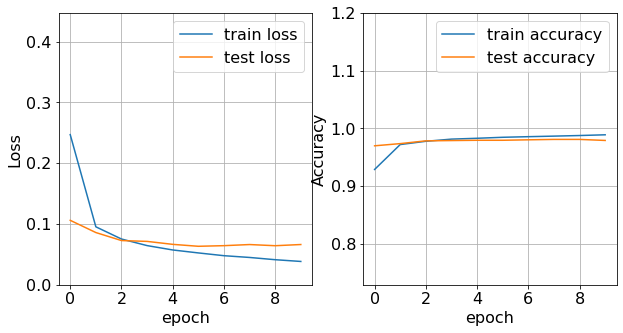

In [ ]:
plot_model(CNN_history_1layer)

### Task 5: Visualising CNN outcomes

In order to visualise the filters and feature maps for the convolutional layers of the CNN, I have created a new version that is based on the initial one in task 4. However, this removes the Max Pooling 2D layer and increases the stride to 2 in the first layer. This helps with downsampling wothout needing the Max Pooling 2D layer. There is little difference in accuracy between the initial model in task 4 and this one.

In [7]:
CNN_model_viz = Sequential(   
    [
        Conv2D(32, kernel_size=(4,4),strides=(2,2),padding = 'same',activation='relu',input_shape=(28,28,1)),
        
        Conv2D(64, kernel_size=(4,4),strides=(2,2),padding='same',activation='relu'),
        
        Conv2D(128, kernel_size=(4,4),strides=(2,2),padding='same',activation='relu'),

        Flatten(),

        Dense(10, activation='softmax')
    ]
)

In [8]:
adam_CNN = tf.keras.optimizers.Adam(learning_rate=0.001)
CNN_model_viz.compile(optimizer=adam_CNN,
              loss='categorical_crossentropy', #use categorical cross-entropy loss as we have used one-hot encoding
              metrics=['accuracy'])

In [9]:
CNN_history_viz = CNN_model_viz.fit(x_train, y_train, epochs=10, batch_size=300, validation_data=(x_test,y_test))

Epoch 1/10
200/200 [==============================] - 21s 100ms/step - loss: 0.3966 - accuracy: 0.8828 - val_loss: 0.1199 - val_accuracy: 0.9633
Epoch 2/10
200/200 [==============================] - 19s 96ms/step - loss: 0.1031 - accuracy: 0.9687 - val_loss: 0.0766 - val_accuracy: 0.9764
Epoch 3/10
200/200 [==============================] - 19s 94ms/step - loss: 0.0719 - accuracy: 0.9782 - val_loss: 0.0602 - val_accuracy: 0.9812
Epoch 4/10
200/200 [==============================] - 20s 101ms/step - loss: 0.0531 - accuracy: 0.9833 - val_loss: 0.0642 - val_accuracy: 0.9793
Epoch 5/10
200/200 [==============================] - 24s 120ms/step - loss: 0.0455 - accuracy: 0.9863 - val_loss: 0.0545 - val_accuracy: 0.9825
Epoch 6/10
200/200 [==============================] - 29s 144ms/step - loss: 0.0365 - accuracy: 0.9892 - val_loss: 0.0551 - val_accuracy: 0.9827
Epoch 7/10
200/200 [==============================] - 32s 160ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0550 - val_accu

In [10]:
layer_outputs = []
layer_names = []
for layer in CNN_model_viz.layers:
    if isinstance(layer, (Conv2D, MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)


In [11]:
for layer in CNN_model_viz.layers:
    if isinstance(layer, Conv2D): #we are only looking for the Conv2D layers
        filters, biases = layer.get_weights() #extract the filters and biases from the layer
        print(layer.name, filters.shape)

conv2d (4, 4, 1, 32)
conv2d_1 (4, 4, 32, 64)
conv2d_2 (4, 4, 64, 128)


This is the 1st, 2nd and 3rd layers of the model defined. Starting by looking at the first layer.

In [12]:
#Getting the weights and biases for the first layer
filters_layer0, biases_layer0 = CNN_model_viz.layers[0].get_weights()

In [13]:
#For the filters (weights), normalising them to be 0 to 1 will help with the visualisation.
filters_layer0 = (filters_layer0 - filters_layer0.min())/(filters_layer0.max() - filters_layer0.min())

In [14]:
#Function to visualise a subset of the filters of the layer
def viz_filters(filters, n_filters, columns, channels):
    i = 1
    fig = plt.figure(figsize=(10,20))
    for j in range(n_filters): 
        f = filters[:,:,:,j]
        for k in range(channels):
            fig.add_subplot(n_filters, columns, i)
            plt.xticks([]) #remove the x-axis ticks from each subplot
            plt.yticks([]) #remove the y-axis ticks from each subplot
            plt.imshow(f[:,:,k], cmap='gray') #show the filter as a greyscale image
            i+=1        
    plt.show()

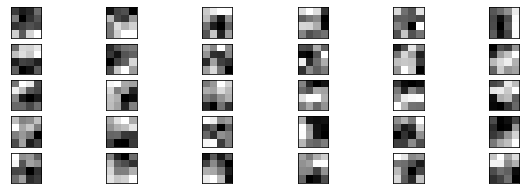

In [15]:
viz_filters(filters_layer0, 30, 6, 1) #plotting the first 30 filters from the only channel

Now to look at layers 2 and 3, the other two Conv2d layers in the CNN. There are more channels and filters in these two layers than there was in the first layer.

In [16]:
filters_layer1, biases_layer1 = CNN_model_viz.layers[1].get_weights()
filters_layer1 = (filters_layer1 - filters_layer1.min())/(filters_layer1.max() - filters_layer1.min())

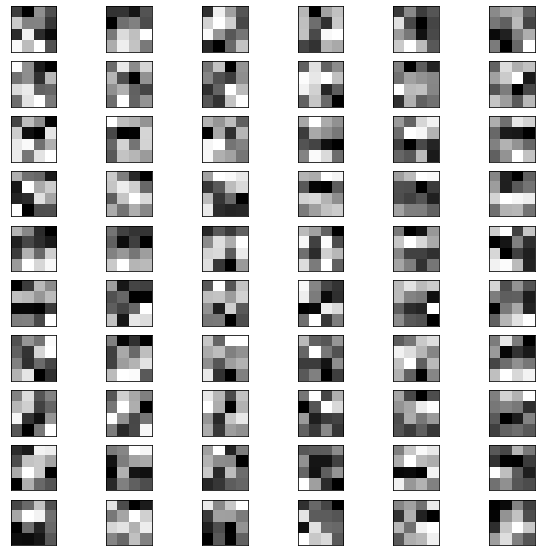

In [17]:
viz_filters(filters_layer1, 20, 6, 3) #plotting the first 20 filters from each of the first 3 channels
#there are 32 channels with 64 filters in each channels so this is just a subset of the filters

In [18]:
filters_layer2, biases_layer2 = CNN_model_viz.layers[2].get_weights()
filters_layer2 = (filters_layer2 - filters_layer2.min())/(filters_layer2.max() - filters_layer2.min())

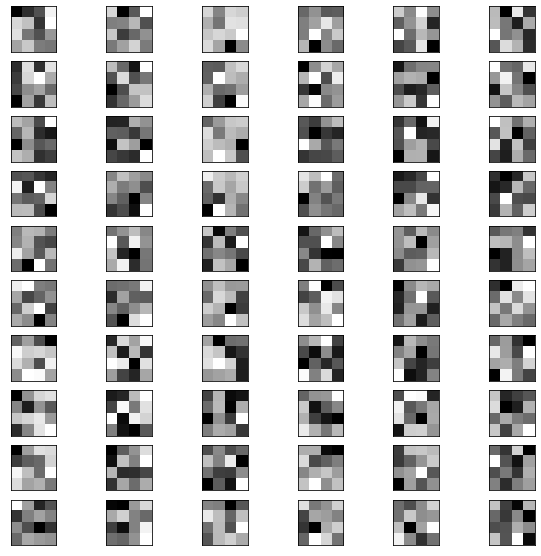

In [19]:
viz_filters(filters_layer2, 20, 6, 3) #plotting the first 20 filters from each of the first 3 channels
#there are 64 channels with 128 filters in each channels so this is just a subset of the filters

As well as plotting the filters, I will plot the feature maps of the layers.

In [20]:
#The feature maps will be produced images from the digit-classes '2' and '9'

#Selecting a picture of 2
image_two = x_test[test_loc_two]
#Selecting an image of 9
image_nine = x_test[test_loc_nine]

In [21]:
#creating a model that takes the same inputs as the CNN model and the same output as the layer of the model. Feeding the
#input image into this model will give the feature map at that stage
CNN_feature_model0 = tf.keras.Model(inputs=CNN_model_viz.inputs, outputs=CNN_model_viz.layers[0].output)

In [22]:
#Feature maps for the first layer and images of two and nine
feature_maps02 = CNN_feature_model0.predict(image_two)
feature_maps09 = CNN_feature_model0.predict(image_nine)

In [23]:
#Function to plot the feature maps
def viz_feature_maps(feature_maps,figure_size):
    i = 1
    fig, ax = plt.subplots(8,4,figsize=figure_size)
    for j in range(8):
        for k in range(4):
            ax = plt.subplot(8,4,i)
            #as before, remove the x and y tick marks from each subplot
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(feature_maps[:,:,:,i-1], cmap='gray') #show the image in greyscale
            i+=1
    plt.show()

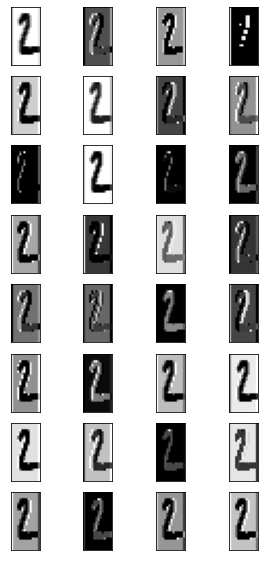

In [24]:
#This cell does not run in Google Colab but will in Jupyter Notebook
viz_feature_maps(feature_maps02,(5,10))

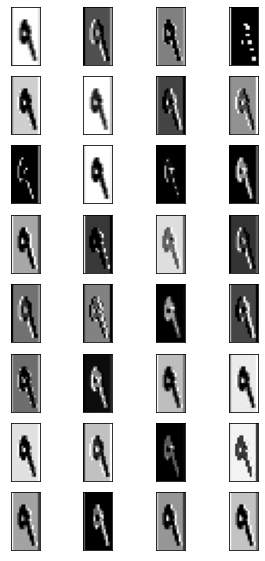

In [25]:
#This cell does not run in Google Colab but will in Jupyter Notebook
viz_feature_maps(feature_maps09,(5,10))

In [26]:
#Now for the second layer
CNN_feature_model1 = tf.keras.Model(inputs=CNN_model_viz.inputs, outputs=CNN_model_viz.layers[1].output)
feature_maps12 = CNN_feature_model1.predict(image_two)
feature_maps19 = CNN_feature_model1.predict(image_nine)

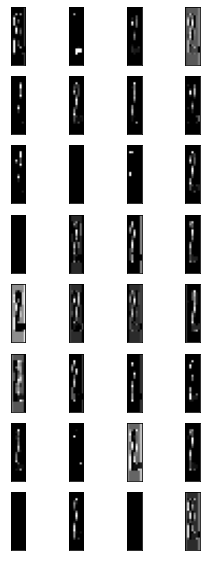

In [27]:
#This cell does not run in Google Colab but will in Jupyter Notebook
viz_feature_maps(feature_maps12, (4,10))

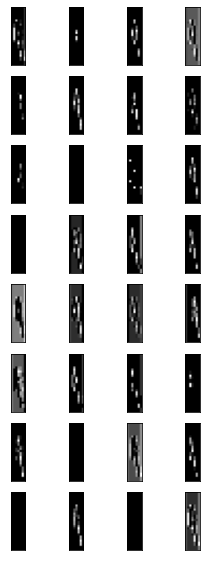

In [28]:
#This cell does not run in Google Colab but will in Jupyter Notebook
viz_feature_maps(feature_maps19, (4,10))

In [29]:
#Now for the third layer
CNN_feature_model2 = tf.keras.Model(inputs=CNN_model_viz.inputs, outputs=CNN_model_viz.layers[2].output)
feature_maps22 = CNN_feature_model2.predict(image_two)
feature_maps29 = CNN_feature_model2.predict(image_nine)

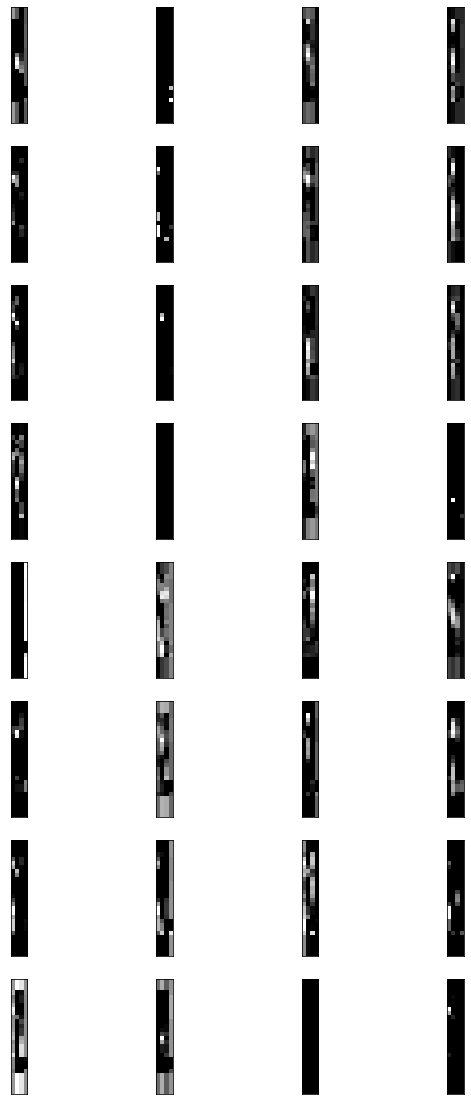

In [30]:
#This cell does not run in Google Colab but will in Jupyter Notebook
viz_feature_maps(feature_maps22, (10,20))

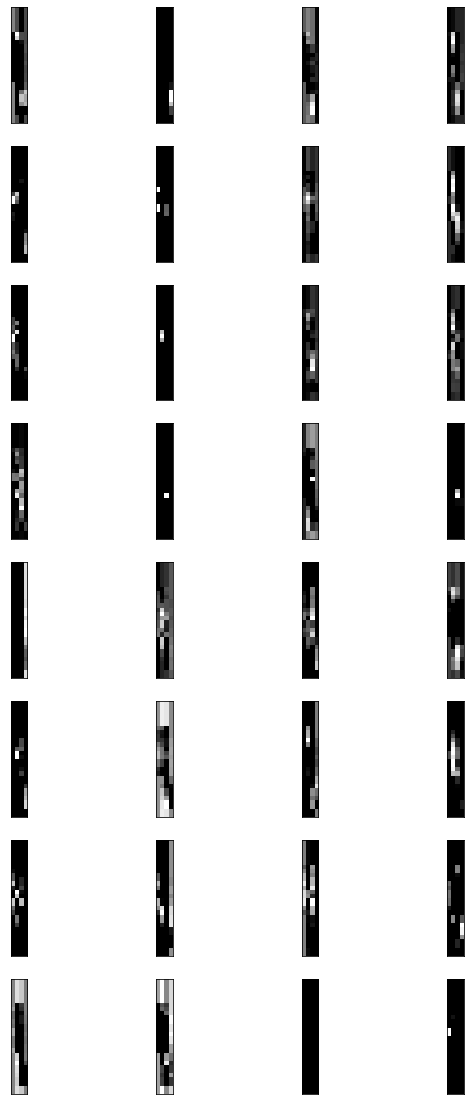

In [31]:
#This cell does not run in Google Colab but will in Jupyter Notebook
viz_feature_maps(feature_maps29, (10,20))

### Task 6: Multi-task Learning

In [33]:
# Splitting data into train, validate and test 

import tensorflow.keras.datasets.fashion_mnist as fashion_mnist
from tensorflow.keras.utils import to_categorical

def load_data():
    # train_X: (60000, 28, 28)
    # train_y: (60000, )
    # test_X: (10000, 28, 28)
    # train_y: (10000, )
    
    (train_X, train_y_1), (test_X, test_y_1) = fashion_mnist.load_data()
    
    split = 7500
    val_X = test_X[:split]
    val_y_1 = test_y_1[:split]
    test_X = test_X[split:]
    test_y_1 = test_y_1[split:]

    n_class_1 = 10
    
    # map to new label
    
    train_y_2 = list(0 if y in [5, 7, 9] else 1 if y in [3, 6, 8] else 2 for y in train_y_1)
    val_y_2 = list(0 if y in [5, 7, 9] else 1 if y in [3, 6, 8] else 2 for y in val_y_1)
    test_y_2 = list(0 if y in [5, 7, 9] else 1 if y in [3, 6, 8] else 2 for y in test_y_1)
    n_class_2 = 3
    
    # train_X: (60000, 28, 28, 1)
    # val_X: (7500, 28, 28, 1)
    # test_X: (2500, 28, 28, 1)
    # train_y_1: (60000, n_class = 10 )
    # train_y_2: (60000, n_class = 3 )
    # val_y_1: (7500, n_class = 10 )
    # val_y_2: (7500, n_class = 3 )
    # test_y_1: (2500, n_class = 3 )
    # test_y_2: (2500, n_class = 3 )
    
    train_X = np.expand_dims(train_X, axis=3)
    val_X = np.expand_dims(val_X, axis=3)
    test_X = np.expand_dims(test_X, axis=3)
    train_y_1 = to_categorical(train_y_1, n_class_1)
    val_y_1 = to_categorical(val_y_1, n_class_1)
    test_y_1 = to_categorical(test_y_1, n_class_1)
    train_y_2 = to_categorical(train_y_2, n_class_2)
    val_y_2 = to_categorical(val_y_2, n_class_2)  
    test_y_2 = to_categorical(test_y_2, n_class_2)
    
    return train_X, train_y_1, train_y_2, val_X, val_y_1, val_y_2, test_X, test_y_1, test_y_2

x_train, y_train_1, y_train_2, x_val, y_val_1, y_val_2, x_test, y_test_1, y_test_2 = load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [34]:
# Reshaping data and scaling images 
x_train = x_train / 255.0
x_train = x_train.reshape(60000, 28, 28, 1)
x_val = x_val / 255.0
x_val = x_val.reshape(7500, 28, 28, 1)
x_test = x_test / 255.0
x_test = x_test.reshape(2500, 28, 28, 1)

In [38]:
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

def build_model(n_class):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding = 'same', strides = 1, activation = 'relu', input_shape = (28,28,1)))
    model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))

    model.add(Conv2D(64, (3, 3), padding ='same', strides = 1, activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))

    model.add(Conv2D(128, (3, 3), padding = 'same', strides = 1, activation = 'relu'))

    model.add(Flatten())
    model.add(Dense(3136, activation = 'relu'))
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(n_class, activation = 'softmax'))
    
    return model

In [39]:
# Building a model for each task
model_1 = build_model(10)
model_2 = build_model(3)

In [40]:
optimizer = Adam(learning_rate = 0.001)

model_1.compile(loss = 'categorical_crossentropy', 
                optimizer = optimizer, 
                metrics = ['accuracy'])

In [41]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 flatten_4 (Flatten)         (None, 6272)             

In [42]:
train_model_1 = model_1.fit(x_train, 
                            y_train_1,
                            epochs = 5,
                            batch_size = 10,
                            verbose = 1,
                            validation_data = (x_val, y_val_1))

Epoch 1/5
6000/6000 [==============================] - 51s 8ms/step - loss: 0.4100 - accuracy: 0.8519 - val_loss: 0.3447 - val_accuracy: 0.8819
Epoch 2/5
6000/6000 [==============================] - 51s 8ms/step - loss: 0.2806 - accuracy: 0.8999 - val_loss: 0.3224 - val_accuracy: 0.8837
Epoch 3/5
6000/6000 [==============================] - 48s 8ms/step - loss: 0.2441 - accuracy: 0.9117 - val_loss: 0.3093 - val_accuracy: 0.8955
Epoch 4/5
6000/6000 [==============================] - 49s 8ms/step - loss: 0.2231 - accuracy: 0.9195 - val_loss: 0.2913 - val_accuracy: 0.9065
Epoch 5/5
6000/6000 [==============================] - 49s 8ms/step - loss: 0.1965 - accuracy: 0.9294 - val_loss: 0.2910 - val_accuracy: 0.9085


In [43]:
train_accuracy = (100 * model_1.evaluate(x_train, y_train_1)[-1])
train_accuracy = str(round(train_accuracy, 1)) + '%'
test_accuracy = (100 * model_1.evaluate(x_test, y_test_1)[-1])
test_accuracy = str(round(test_accuracy, 1))+ '%'

print('Task 1 training accuracy =', train_accuracy)
print('Task 1 test accuracy = ', test_accuracy)

79/79 [==============================] - 0s 4ms/step - loss: 0.2677 - accuracy: 0.9136
Task 1 training accuracy = 94.1%
Task 1 test accuracy =  91.4%


In [44]:
model_2.compile(loss = 'categorical_crossentropy', 
                optimizer = optimizer, 
                metrics = ['accuracy'])

In [45]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 flatten_5 (Flatten)         (None, 6272)             

In [46]:
train_model_2 = model_2.fit(x_train, 
                            y_train_2,
                            epochs = 5,
                            batch_size = 10,
                            verbose = 1,
                            validation_data = (x_val, y_val_2))

Epoch 1/5
6000/6000 [==============================] - 49s 8ms/step - loss: 0.2787 - accuracy: 0.8710 - val_loss: 0.2563 - val_accuracy: 0.8865
Epoch 2/5
6000/6000 [==============================] - 49s 8ms/step - loss: 0.1964 - accuracy: 0.9129 - val_loss: 0.1935 - val_accuracy: 0.9185
Epoch 3/5
6000/6000 [==============================] - 49s 8ms/step - loss: 0.1784 - accuracy: 0.9215 - val_loss: 0.1825 - val_accuracy: 0.9216
Epoch 4/5
6000/6000 [==============================] - 49s 8ms/step - loss: 0.1638 - accuracy: 0.9284 - val_loss: 0.1825 - val_accuracy: 0.9237
Epoch 5/5
6000/6000 [==============================] - 49s 8ms/step - loss: 0.1561 - accuracy: 0.9325 - val_loss: 0.1777 - val_accuracy: 0.9244


In [47]:
train_accuracy = (100 * model_2.evaluate(x_train, y_train_2)[-1])
train_accuracy = str(round(train_accuracy, 1)) + '%'
test_accuracy = (100 * model_2.evaluate(x_test, y_test_2)[-1])
test_accuracy = str(round(test_accuracy, 1))+ '%'

print('Task 2 training accuracy =', train_accuracy)
print('Task 2 test accuracy = ', test_accuracy)

79/79 [==============================] - 0s 4ms/step - loss: 0.1619 - accuracy: 0.9292
Task 2 training accuracy = 93.7%
Task 2 test accuracy =  92.9%


In [48]:
def train_mtl_model():

  inputs = Input(shape = (28, 28, 1), name = 'main_input')
  
  # Both tasks sharing common layers on main branch
  main_branch = Conv2D(32, (3, 3), padding = 'same', strides = 1, activation = 'relu')(inputs)
  main_branch = MaxPooling2D(pool_size = (2, 2), strides = 2)(main_branch)

  main_branch = Conv2D(64, (3, 3), padding = 'same', strides = 2, activation = 'relu')(main_branch)
  main_branch = MaxPooling2D(pool_size = (2, 2), strides = 2)(main_branch)

  main_branch = Conv2D(128, (3, 3), padding = 'same', strides = 2, activation = 'relu')(main_branch)
  
  main_branch = Flatten()(main_branch)
  main_branch = Dense(3136, activation = 'relu')(main_branch)

  # Split into different branches for task specific layers 
  task_1_branch = Dense(1024, activation = 'relu')(main_branch)
  task_1_branch = Dense(100, activation = 'relu')(task_1_branch)
  task_1_branch = Dense(10, activation = 'softmax', name = 'task_1')(task_1_branch)

  task_2_branch = Dense(1024, activation = 'relu')(main_branch)
  task_2_branch = Dense(100, activation = 'relu')(task_2_branch)
  task_2_branch = Dense(3, activation = 'softmax', name = 'task_2')(task_2_branch)

  model = Model(inputs = inputs, outputs = [task_1_branch, task_2_branch])

  return model 
  

In [49]:
mtl_model = train_mtl_model()

In [50]:
gamma = 0.5

mtl_model.compile(loss = 'categorical_crossentropy', 
                  loss_weights = {'task_1': gamma, 
                                  'task_2': 1 - gamma},
                  optimizer = 'adam', 
                  metrics = ['accuracy'])

In [51]:
mtl_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main_input (InputLayer)        [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_18 (Conv2D)             (None, 28, 28, 32)   320         ['main_input[0][0]']             
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 14, 14, 32)  0           ['conv2d_18[0][0]']              
                                                                                                  
 conv2d_19 (Conv2D)             (None, 7, 7, 64)     18496       ['max_pooling2d_8[0][0]']        
                                                                                            

In [52]:
train_model_3 = mtl_model.fit({'main_input': x_train},
                              {'task_1': y_train_1, 'task_2': y_train_2},
                              epochs = 5,
                              batch_size = 10,
                              verbose = 1,
                              validation_data = (x_val, 
                                                {'task_1' : y_val_1, 
                                                 'task_2' : y_val_2}))

Epoch 1/5
6000/6000 [==============================] - 38s 6ms/step - loss: 0.3626 - task_1_loss: 0.4940 - task_2_loss: 0.2312 - task_1_accuracy: 0.8185 - task_2_accuracy: 0.8951 - val_loss: 0.2713 - val_task_1_loss: 0.3602 - val_task_2_loss: 0.1825 - val_task_1_accuracy: 0.8677 - val_task_2_accuracy: 0.9200
Epoch 2/5
6000/6000 [==============================] - 36s 6ms/step - loss: 0.2560 - task_1_loss: 0.3394 - task_2_loss: 0.1726 - task_1_accuracy: 0.8763 - task_2_accuracy: 0.9243 - val_loss: 0.2684 - val_task_1_loss: 0.3550 - val_task_2_loss: 0.1819 - val_task_1_accuracy: 0.8788 - val_task_2_accuracy: 0.9239
Epoch 3/5
6000/6000 [==============================] - 37s 6ms/step - loss: 0.2254 - task_1_loss: 0.2974 - task_2_loss: 0.1534 - task_1_accuracy: 0.8931 - task_2_accuracy: 0.9333 - val_loss: 0.2480 - val_task_1_loss: 0.3299 - val_task_2_loss: 0.1661 - val_task_1_accuracy: 0.8816 - val_task_2_accuracy: 0.9305
Epoch 4/5
6000/6000 [==============================] - 35s 6ms/step - 

In [53]:
df_2 = pd.DataFrame(columns=['Gamma', 'Task 1 Accuracy', 'Task 2 Accuracy'])
gammas = [0, 0.25, 0.5, 0.75, 1]

# Returning accuracy for different gamma values 
for gamma in gammas:

  mtl_model = train_mtl_model()

  mtl_model.compile(loss = 'categorical_crossentropy', 
                    loss_weights = {'task_1': gamma, 
                                    'task_2': 1 - gamma},
                    optimizer = 'adam', 
                    metrics = ['accuracy'])
  
  train_model_3 = mtl_model.fit({'main_input': x_train},
                              {'task_1': y_train_1, 'task_2': y_train_2},
                              epochs = 5,
                              batch_size = 10,
                              verbose = 1,
                              validation_data = (x_val, 
                                                {'task_1' : y_val_1, 
                                                 'task_2' : y_val_2}))
  
  results = mtl_model.evaluate(x_test, {'task_1' : y_test_1, 'task_2' : y_test_2})

  df_2 = df_2.append({'Gamma':str(gamma), 
                      'Task 1 Accuracy':results[3], 
                      'Task 2 Accuracy':results[4]}, ignore_index=True)


Epoch 1/5
6000/6000 [==============================] - 38s 6ms/step - loss: 0.2386 - task_1_loss: 2.2981 - task_2_loss: 0.2386 - task_1_accuracy: 0.0656 - task_2_accuracy: 0.8949 - val_loss: 0.2074 - val_task_1_loss: 2.3123 - val_task_2_loss: 0.2074 - val_task_1_accuracy: 0.0113 - val_task_2_accuracy: 0.9045
Epoch 2/5
6000/6000 [==============================] - 36s 6ms/step - loss: 0.1834 - task_1_loss: 2.3062 - task_2_loss: 0.1834 - task_1_accuracy: 0.0656 - task_2_accuracy: 0.9190 - val_loss: 0.1829 - val_task_1_loss: 2.3237 - val_task_2_loss: 0.1829 - val_task_1_accuracy: 0.0527 - val_task_2_accuracy: 0.9232
Epoch 3/5
6000/6000 [==============================] - 37s 6ms/step - loss: 0.1660 - task_1_loss: 2.3114 - task_2_loss: 0.1660 - task_1_accuracy: 0.0844 - task_2_accuracy: 0.9276 - val_loss: 0.2096 - val_task_1_loss: 2.3395 - val_task_2_loss: 0.2096 - val_task_1_accuracy: 0.0804 - val_task_2_accuracy: 0.9141
Epoch 4/5
6000/6000 [==============================] - 37s 6ms/step - 

In [54]:
df_2['Task 1 Accuracy'] = (100 * df_2['Task 1 Accuracy']).round(1).astype(str) + '%'
df_2['Task 2 Accuracy'] = (100 * df_2['Task 2 Accuracy']).round(1).astype(str) + '%'

In [55]:
display(df_2)

,Gamma,Task 1 Accuracy,Task 2 Accuracy
0,0,2.0%,90.6%
1,0.25,89.9%,93.6%
2,0.5,89.9%,94.0%
3,0.75,89.4%,93.5%
4,1,89.8%,45.1%
